# Gradient in _K_ with migration

In these simulations, we imposed a gradient in carrying capacity across the matrix, with rural population being the largest and urban the smallest. All populations were initialized at carrying capacity. We performed simulations under 10 migration rates: 0; 0.001; 0.0025; 0.005; 0.01; 0.02; 0.035; 0.05; 0.1; 0.2; 0.35; 0.5. The parameter combinations were as follows (all varied parameters crossed factorially, total simulations = 12): 

* Number of simulations: 1000
* Number of generations: 500
* Max Creation probability: NA
* Bottleneck proportion: NA
* pA and pB: 0.5
* Migration rate: [0; 0.001; 0.0025; 0.005; 0.01; 0.02; 0.035; 0.05; 0.1; 0.2; 0.35; 0.5]
* Maximum _K_ (rural): 1000
* Minimum _K_ (urban): [10; 100; 500; 1000]

In [1]:
library(ggplot2)
library(grid)
library(data.table)
library(Rmisc)
library(dplyr)

Loading required package: lattice
Loading required package: plyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Themes used for plotting
ng1=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

ng1.45=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15,angle=45,hjust=1),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

In [4]:
#Working directory for datasets varying migration rate and bottleneck proportion
setwd('/Users/jamessantangelo/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Data/summary-datasets/allFill_Kvary/allFill_Kvary_KminVary/')

# Dataset varying minimum K
MeansProps_KminVary <- fread('20171225_MeansProps_allFill_Kvary_KminVary.csv')
MeansProps_KminVary$min_K <- as.factor(as.character(MeansProps_KminVary$min_K))
MeansProps_KminVary$Mig_rate <- as.factor(as.character(MeansProps_KminVary$Mig_rate))
MeansProps_KminVary$min_K <- factor(MeansProps_KminVary$min_K, levels=c("10", "100", "500", "1000"))

# Data subsets
MeansProps_KminVary_NoMig_Gen250 <- subset(MeansProps_KminVary, id == "Cyan" & Mig_rate == 0 & Generation == 250)

In [9]:
MeansProps_KminVary_NoMig_Gen250

id,Mig_rate,min_K,Generation,mean,sd,n,se,ci_mean,prop_sigPos,⋯,se_pos,ci_pos,se_sigPos,ci_sigPos,prop_sigNeg,prop_neg,se_neg,ci_neg,se_sigNeg,ci_sigNeg
Cyan,0,10,250,6.227828e-03,0.004864251,1000,0.0001538211,0.0003014894,0.279,⋯,0.009653186,0.01892024,0.014183053,0.02779878,0.000,0.104,0.009653186,0.01892024,0.000000000,0.000000000
Cyan,0,100,250,5.080930e-03,0.004502766,1000,0.0001423900,0.0002790843,0.215,⋯,0.010422284,0.02042768,0.012991343,0.02546303,0.000,0.124,0.010422284,0.02042768,0.000000000,0.000000000
Cyan,0,500,250,1.372556e-03,0.003946548,1000,0.0001248008,0.0002446096,0.067,⋯,0.015122301,0.02963971,0.007906390,0.01549652,0.011,0.354,0.015122301,0.02963971,0.003298333,0.006464733
Cyan,0,1000,250,-7.633424e-05,0.003456281,1000,0.0001092972,0.0002142225,0.029,⋯,0.015782902,0.03093449,0.005306505,0.01040075,0.026,0.530,0.015782902,0.03093449,0.005032296,0.009863300


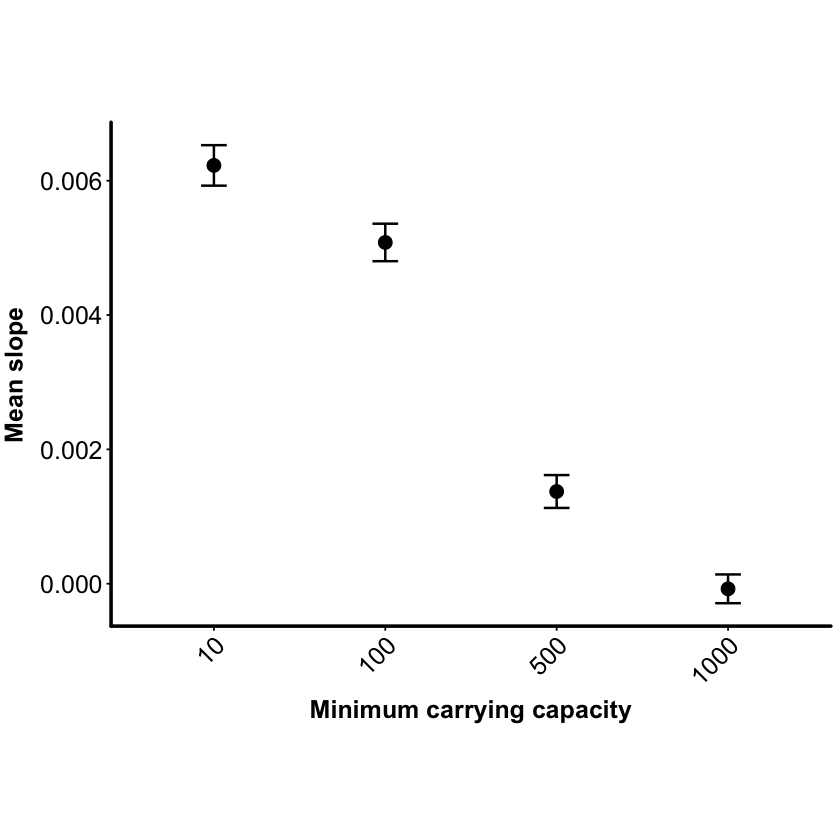

In [86]:
#Plot mean slope by minimum K. No migration
MeanSlope_Kmin <- ggplot(MeansProps_KminVary_NoMig_Gen250, aes(x = factor(min_K), y = mean)) + 
    geom_errorbar(aes(ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size = 0.7, 
    position = position_dodge(width = 0.55)) +
    ylab("Mean slope") + xlab("Minimum carrying capacity") + geom_point(size = 3.5, color = "black", 
    position = position_dodge(width = 0.55)) + ng1.45
MeanSlope_Kmin

In [87]:
SlopeSum_Melt_KminVary <- dplyr::select(MeansProps_KminVary_NoMig_Gen250, min_K, prop_sigPos, ci_sigPos, prop_sigNeg,
  ci_sigNeg)

dm1 <- melt(SlopeSum_Melt_KminVary,
        # ID variables - all the variables to keep but not split apart on
    id.vars=c("min_K", "ci_sigPos"),
        # The source columns
    measure.vars=c("prop_sigPos"),
        # Name of the destination column that will identify the original
        # column that the measurement came from
    variable.name="Variable",
    value.name="Proportion"
)

dm2 <- melt(SlopeSum_Melt_KminVary,
        # ID variables - all the variables to keep but not split apart on
    id.vars=c("min_K", "ci_sigNeg"),
        # The source columns
    measure.vars=c("prop_sigNeg"),
        # Name of the destination column that will identify the original
        # column that the measurement came from
    variable.name="Variable",
    value.name="Proportion"
)

#Rename columns
setnames(dm1, old = "ci_sigPos", new = "ci")
setnames(dm2, old = "ci_sigNeg", new = "ci")

#Merge melted dataframes
SlopeSum_Melt_KminVary <- rbind(dm1, dm2)
SlopeSum_Melt_KminVary

min_K,ci,Variable,Proportion
10,0.027798784,prop_sigPos,0.279
100,0.025463033,prop_sigPos,0.215
500,0.015496524,prop_sigPos,0.067
1000,0.010400751,prop_sigPos,0.029
10,0.000000000,prop_sigNeg,0.000
100,0.000000000,prop_sigNeg,0.000
500,0.006464733,prop_sigNeg,0.011
1000,0.009863300,prop_sigNeg,0.026


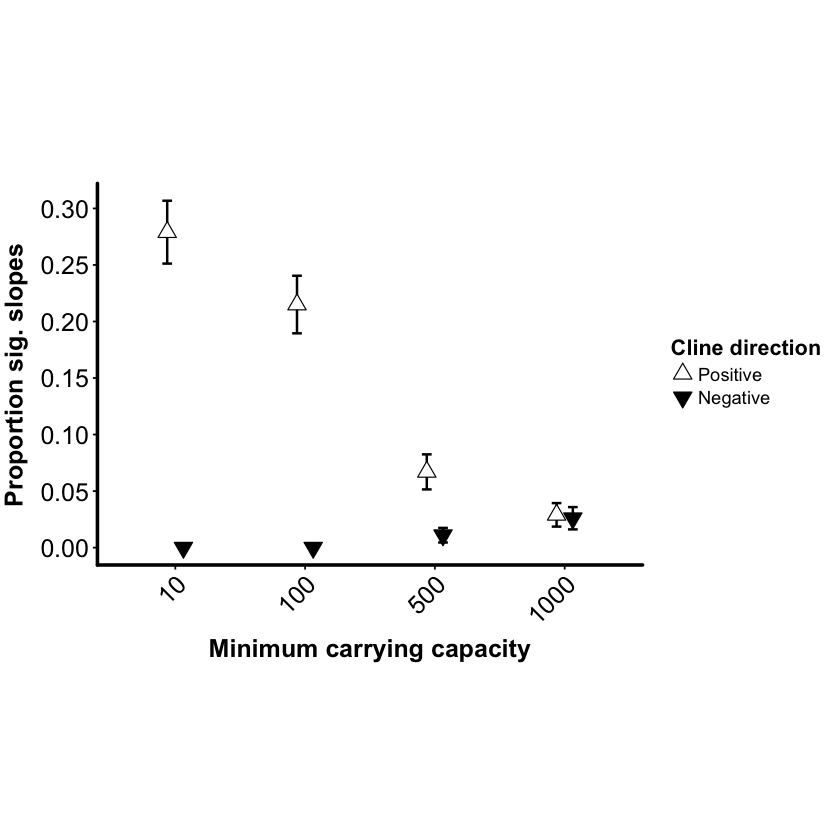

In [99]:
#Plot proportion of significant slopes by migration rate
PropSig_KminVary_Dir <- ggplot(SlopeSum_Melt_KminVary, aes(x = factor(min_K), y = Proportion, 
    shape = Variable, fill = Variable)) + 
    geom_errorbar(aes(ymin = Proportion - ci, ymax = Proportion + ci), width=0.15, size = 0.7, 
    position = position_dodge(width = 0.25)) +
    ylab("Proportion sig. slopes") + xlab("Minimum carrying capacity") + geom_point(size = 3.5, color = "black", 
    position = position_dodge(width = 0.25)) +
    scale_shape_manual(labels = c("Positive", "Negative"),values=c(24, 25)) +
    scale_fill_manual(labels = c("Positive", "Negative"),values=c("white", "black")) +
    scale_y_continuous(breaks = seq(from = 0, to = 1.0, by = 0.05)) +
    labs(shape = 'Cline direction', fill = 'Cline direction') + ng1.45
PropSig_KminVary_Dir

In [14]:
#Working directory for datasets varying migration rate and bottleneck proportion
setwd('~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Data/summary-datasets/allFill_Kvary/allFill_Kvary_Kmin10_AllMig')

#Dataset with mean and proportions across all 1000 simulations
Kvary_Mig_Summary <- fread('20171106_Kvary-WithMig_SlopeSummaryGen_distRev.csv', header = T)
Kvary_Mig_Summary$Mig_rate <- as.factor(as.character(Kvary_Mig_Summary$Mig_rate))

#Dataset with slope and P-value every generation every simulation
KVary_Mig_Coefs <- fread('20171106_Kvary-WithMig_Coef_distRev.csv', header = T)

# Dataset used for plotting distribution of slopes in dominant allele clines. No Migration. Generation 250
Coefs_pA_NoMig_Gen250 <- subset(KVary_Mig_Coefs, id == "pA" & Mig_rate == 0 & Generation == 250)

# Dataset used for plotting distribution of slopes HCN clines. No Migration. Generation 250
Coefs_Cyan_NoMig_Gen250 <- subset(KVary_Mig_Coefs, id == "Cyan" & Mig_rate == 0 & Generation == 250)

# Dataset used for plotting change in mean slope and proportions with increasing generations
Kvary_Mig_Summary_Cyan <- subset(Kvary_Mig_Summary, id == "Cyan" & Mig_rate %in% c("0", "0.001", "0.0025", "0.005", "0.01", "0.02", "0.035", "0.05"))
Kvary_Mig_Summary_Cyan$prop_sigPos[Kvary_Mig_Summary_Cyan$prop_sigPos == 1.000] <- 0.0

# Dataset used for plotting change in mean slope and proportions with varying migration rate
Kvary_Mig_Summary_250 <- subset(Kvary_Mig_Summary, Generation == 250)
Kvary_Mig_Summary_GenOne <- subset(Kvary_Mig_Summary, Generation == 1)
Kvary_Mig_Summary_Gen50 <- subset(Kvary_Mig_Summary, Generation == 50)
Kvary_Mig_Summary_Gen100 <- subset(Kvary_Mig_Summary, Generation == 100)
Kvary_Mig_Summary_Gen200 <- subset(Kvary_Mig_Summary, Generation == 200)
Kvary_Mig_Summary_Gen250 <- subset(Kvary_Mig_Summary, Generation == 250)
Kvary_Mig_Summary_Gen300 <- subset(Kvary_Mig_Summary, Generation == 300)
Kvary_Mig_Summary_Gen400 <- subset(Kvary_Mig_Summary, Generation == 400)
Kvary_Mig_Summary_Gen500 <- subset(Kvary_Mig_Summary, Generation == 500)

# Mean of significant slopes
MeansProps_NoMig_Gen250_SigOnly <- KVary_Mig_Coefs %>%
    filter(id == "Cyan" & Generation == 250 & p.value < 0.05 & estimate > 0) %>% 
    group_by(Mig_rate) %>%
    summarize(mean_SigSlope = mean(estimate), 
              sd_SigSlope = sd(estimate),
              n = length(estimate),
              se_SigSlope = sd_SigSlope / sqrt(n), 
              ci_SigSlope = 1.96 * se_SigSlope)

Read 19500000 rows and 6 (of 6) columns from 0.996 GB file in 00:00:12


In [13]:
head(Kvary_Mig_Summary_250)

id,Mig_rate,Generation,mean,sd,n,se,ci_mean,prop_sigPos,prop_pos,se_pos,ci_pos,se_sigPos,ci_sigPos,prop_sigNeg,prop_neg,se_neg,ci_neg,se_sigNeg,ci_sigNeg
Cyan,0,250,0.005925492,0.004690699,1000,0.0001483329,0.0002907326,0.267,0.897,0.009612024,0.01883957,0.01398967,0.02741976,0.001,0.103,0.009612024,0.01883957,0.0009994999,0.001959020
Cyan,0.001,250,0.006136250,0.004399479,1000,0.0001391237,0.0002726825,0.285,0.914,0.008865890,0.01737714,0.01427498,0.02797896,0.000,0.086,0.008865890,0.01737714,0.0000000000,0.000000000
Cyan,0.0025,250,0.005673337,0.004458581,1000,0.0001409927,0.0002763457,0.316,0.889,0.009933730,0.01947011,0.01470184,0.02881560,0.001,0.111,0.009933730,0.01947011,0.0009994999,0.001959020
Cyan,0.005,250,0.005491940,0.004198660,1000,0.0001327733,0.0002602356,0.355,0.897,0.009612024,0.01883957,0.01513192,0.02965856,0.000,0.103,0.009612024,0.01883957,0.0000000000,0.000000000
Cyan,0.01,250,0.004881470,0.003724500,1000,0.0001177790,0.0002308469,0.361,0.899,0.009528851,0.01867655,0.01518812,0.02976872,0.001,0.101,0.009528851,0.01867655,0.0009994999,0.001959020
Cyan,0.02,250,0.003827675,0.003202619,1000,0.0001012757,0.0001985004,0.346,0.876,0.010422284,0.02042768,0.01504274,0.02948377,0.003,0.124,0.010422284,0.02042768,0.0017294508,0.003389724


In [27]:
str(MeansProps_NoMig_Gen250_SigOnly)

Classes ‘grouped_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	39 obs. of  7 variables:
 $ Mig_rate     : num  0 0 0 0.001 0.001 0.001 0.0025 0.0025 0.0025 0.005 ...
 $ id           : chr  "Cyan" "pA" "pB" "Cyan" ...
 $ mean_SigSlope: num  0.0116 0.0109 0.0108 0.0112 0.0102 ...
 $ sd_SigSlope  : num  0.00213 0.00142 0.00178 0.00205 0.00179 ...
 $ n            : int  267 33 33 285 36 32 316 41 34 355 ...
 $ se_SigSlope  : num  0.000131 0.000247 0.00031 0.000122 0.000298 ...
 $ ci_SigSlope  : num  0.000256 0.000484 0.000608 0.000239 0.000583 ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "vars")=List of 1
  ..$ : symbol Mig_rate
 - attr(*, "drop")= logi TRUE


## Distribution of slopes for allele and phenotype clines

For each simulation (n = 1000), I ran a linear model examining the change in either the frequency of either dominant allele with distance from the starting population or the frequency of HCN with distance. These models have different predictions: for clines in the dominant alleles at either locus, we expect on average half to go up and half to go down whereas for clines in HCN we expect the majority to go up (i.e. positive, loss of HCN across space) due to the duplicate ressecivity underlying the phenotype. 

We can start to get at these predictions by looking at the distribution of the slopes from the different models. Note that the distribution of slopes is plotted when migration is 0. **First, we look at the distribution of slopes from models examining the change in the frequency of _Ac_ with distance. As predicted, approximately half are positive and half are negative. Blue shading represents significant clines.** 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


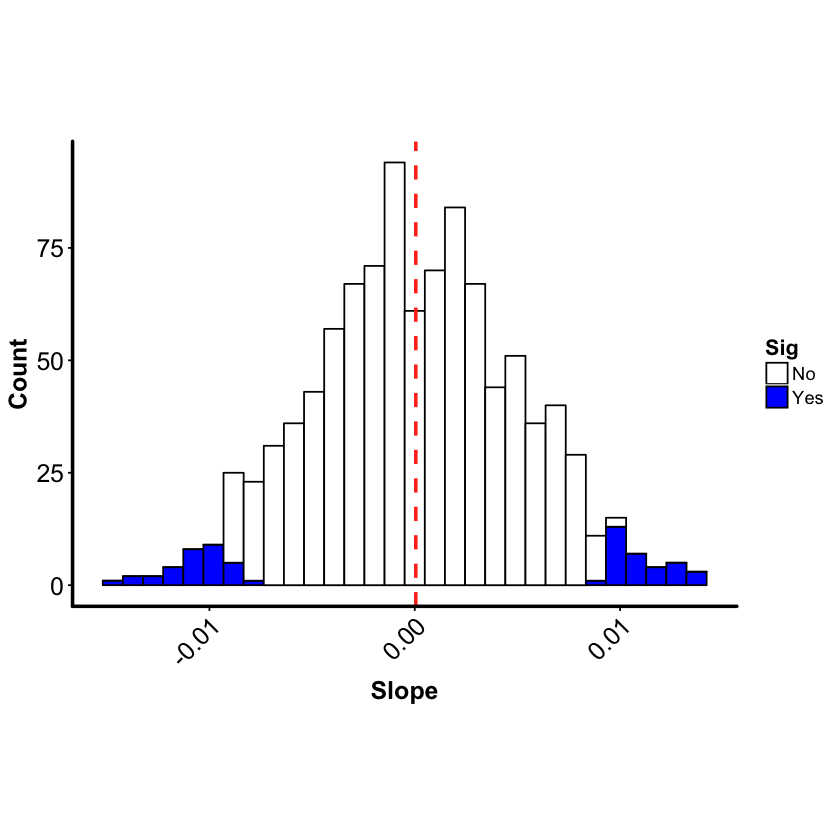

In [16]:
Coefs_pA_NoMig_Gen250 <- within(Coefs_pA_NoMig_Gen250, {
    Sig = ifelse(p.value < 0.05, "Yes", "No")
})
# Histogram of slopes for 'A' allele with no migration
HistSlopes_pA_NoMig_Gen250 <- ggplot(Coefs_pA_NoMig_Gen250, aes(x = estimate, fill = Sig)) +
    ylab("Count") + xlab("Slope") + 
    geom_histogram(color = "black") +
    geom_vline(data = Coefs_pA_NoMig_Gen250, aes(xintercept = mean(estimate)), size = 1, colour = "#FF3721", linetype = "dashed") +
    scale_fill_manual(labels = c("No", "Yes"), values=c("white", "blue")) + ng1.45
HistSlopes_pA_NoMig_Gen250

**We find the same thing for the _Li_ allele. Results not shown**

**For clines in the frequeny of HCN, however, the majority of the slopes are negative and there are no significantly positive slopes. The mean slop is also negative**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


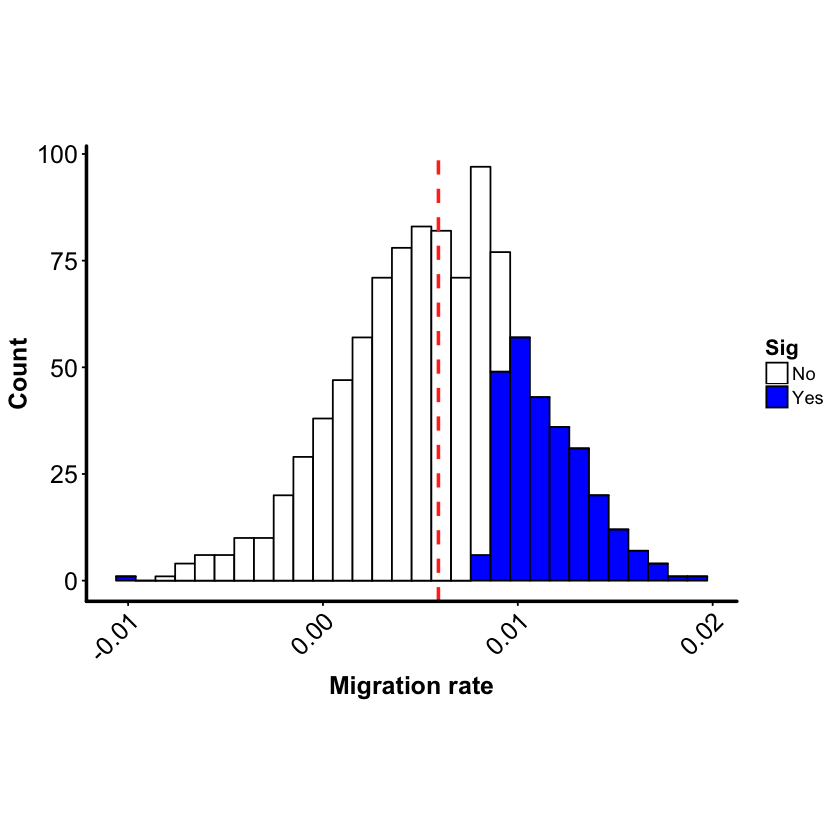

In [17]:
Coefs_Cyan_NoMig_Gen250 <- within(Coefs_Cyan_NoMig_Gen250, {
    Sig = ifelse(p.value < 0.05, "Yes", "No")
})
# Histogram of slopes for 'Cyan' allele with no migration
HistSlopes_Cyan_NoMig_Gen250 <- ggplot(Coefs_Cyan_NoMig_Gen250, aes(x = estimate, fill = Sig)) +
    ylab("Count") + xlab("Migration rate") + 
    geom_histogram(color = "black") +
    geom_vline(data = Coefs_Cyan_NoMig_Gen250, aes(xintercept = mean(estimate)), size = 1, colour = "#FF3721", linetype = "dashed") +
    scale_fill_manual(labels = c("No", "Yes"), values=c("white", "blue")) + ng1.45
HistSlopes_Cyan_NoMig_Gen250

## Mean slope with migration

Here I looked at how the mean slope of allele clines and HCN clines changed with migration. 

Migration had no effect on the mean slope of clines in _Ac_ or _Li_. However, increasing migration resulted in HCN clines with slopes closer to 0. THis is consistent with migration homogenizing alleles and flatenning out clines. 

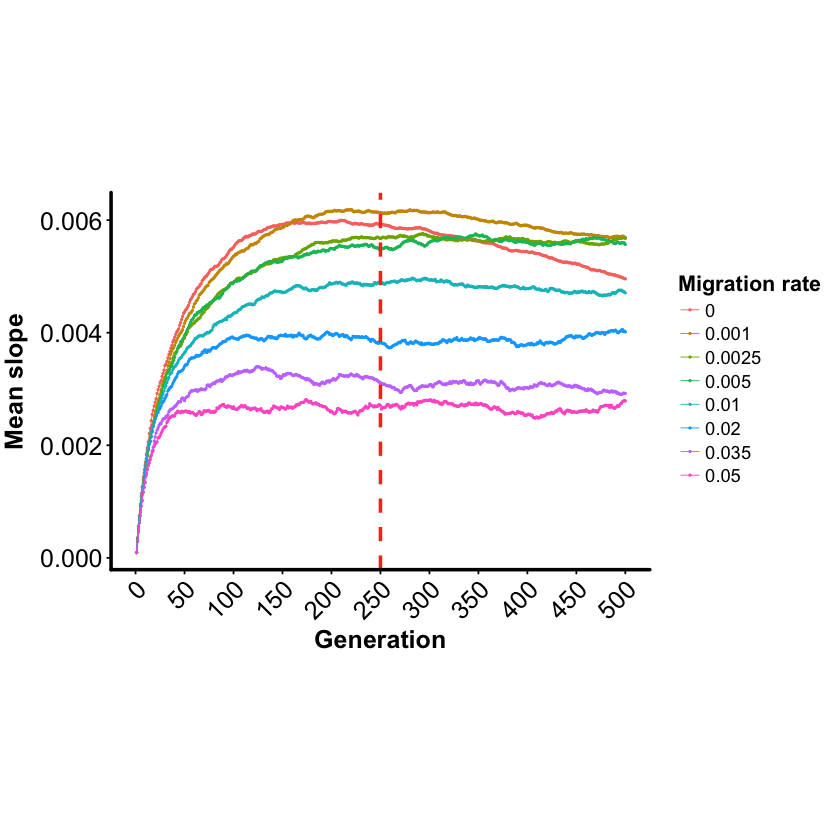

In [26]:
MeanSlope_Cyan_byGen <- ggplot(Kvary_Mig_Summary_Cyan, aes(x = Generation, y = mean, group = Mig_rate, color = Mig_rate)) + 
    ylab("Mean slope") + xlab("Generation") + geom_point(size = 0.25, aes(color = Mig_rate)) +
    geom_line(size = 0.25, aes(color = Mig_rate)) + 
    coord_cartesian(xlim = c(0, 500)) + scale_x_continuous(breaks = seq(from = 0, to = 500, by = 50)) + 
    labs(color = "Migration rate") + 
    geom_vline(data = Kvary_Mig_Summary_Cyan, xintercept = 250, size = 1, colour = "#FF3721", linetype = "dashed") + ng1.45
MeanSlope_Cyan_byGen 

In [20]:
Kvary_Mig_Summary_250[,c(1, 2, 15)]

id,Mig_rate,prop_sigNeg
Cyan,0,0.001
Cyan,0.001,0.000
Cyan,0.0025,0.001
Cyan,0.005,0.000
Cyan,0.01,0.001
Cyan,0.02,0.003
Cyan,0.035,0.005
Cyan,0.05,0.007
Cyan,0.1,0.025
Cyan,0.2,0.031


Warning message:
“Ignoring unknown aesthetics: y, shape, fill”Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


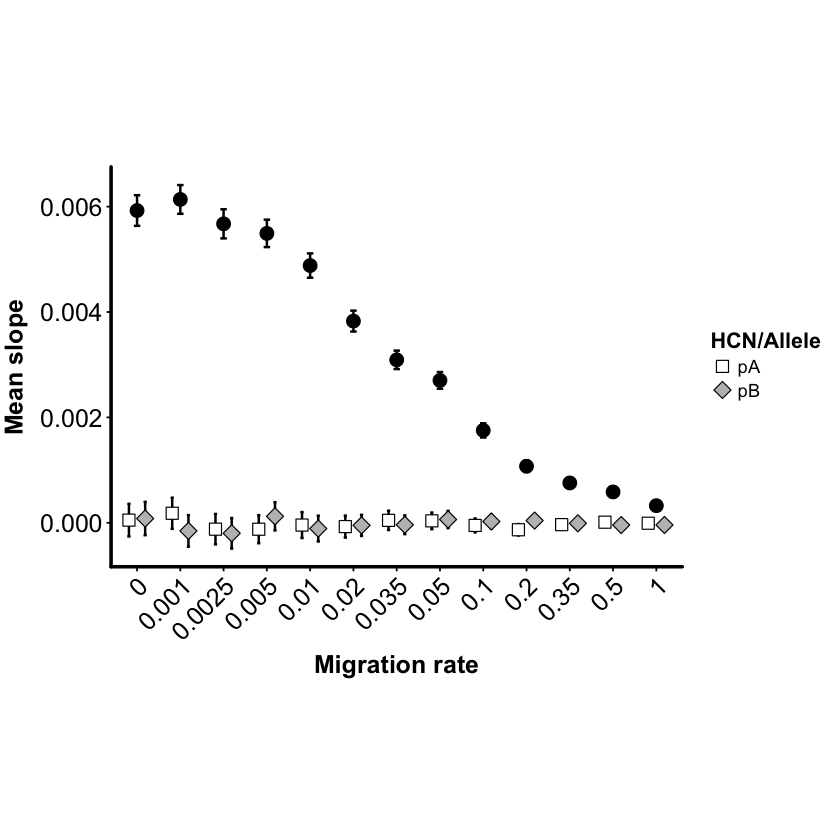

In [97]:
#Plot mean slope by migration rate, colored and shaped by phenotype or alleles
Kvary_Mig_Summary_250_Cyan <- subset(Kvary_Mig_Summary_250, id == "Cyan")
Kvary_Mig_Summary_250_Alleles <- subset(Kvary_Mig_Summary_250, id %in% c("pA", "pB"))

p1 <- ggplot(Kvary_Mig_Summary_250_Cyan, aes(x = factor(Mig_rate), y = mean)) + 
    geom_errorbar(aes(ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size = 0.7) +
    ylab("Mean slope") + xlab("Migration rate") + 
    geom_point(size = 3.5, color = "black") +
    scale_shape_manual(labels = c("Cyan"), values=21) +
    scale_fill_manual(labels = c("Cyan"), values="black") 

MeanSlope_Mig_Type <- p1 +
    geom_errorbar(data = Kvary_Mig_Summary_250_Alleles, aes(x = factor(Mig_rate), y = mean, 
    shape = factor(id), fill = factor(id), ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size = 0.7, 
    position = position_dodge(width = 0.75)) +
    ylab("Mean slope") + xlab("Migration rate") + 
    geom_point(data = Kvary_Mig_Summary_250_Alleles, aes(x = factor(Mig_rate), y = mean, 
    shape = factor(id), fill = factor(id)), size = 3.5, position = position_dodge(width = 0.75)) +
    scale_shape_manual(labels = c("pA", "pB"), values=c(22, 23)) +
    scale_fill_manual(labels = c("pA", "pB"), values=c("white", "grey")) + 
    labs(shape = "HCN/Allele", fill = "HCN/Allele") + ng1.45
MeanSlope_Mig_Type

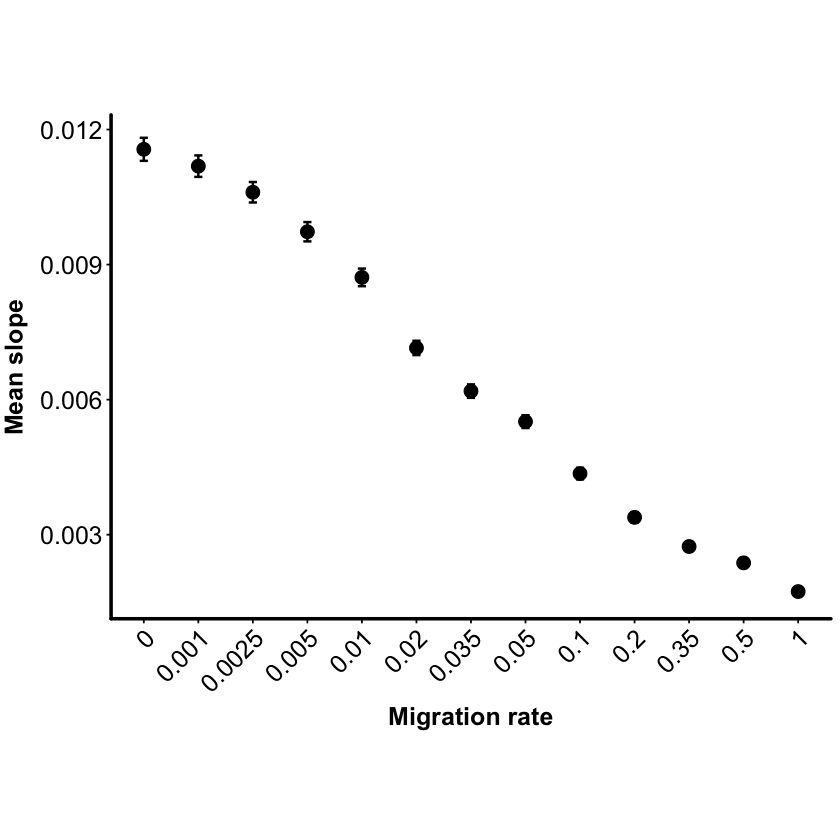

In [91]:
#Plot mean slope by migration rate for significant slopes only
MeanSlope_Mig_SigOnly <- ggplot(MeansProps_NoMig_Gen250_SigOnly, aes(x = factor(Mig_rate), y = mean_SigSlope)) + 
    geom_errorbar(aes(ymin = mean_SigSlope - ci_SigSlope, ymax = mean_SigSlope + ci_SigSlope), width=0.15, size = 0.7) +
    ylab("Mean slope") + xlab("Migration rate") + geom_point(size = 3.5, color = "black") + ng1.45
MeanSlope_Mig_SigOnly

## Effects of migration on proportion of negative and positive clines

Here I look at how migration affects the proportion of significantly negative and positive clines in the _Ac_ and _Li_ alleles and in HCN clines. 

**Positive clines**: Less HCN in urban environment (i.e. loss of HCN across space)  
**Negative clines**: More HCN in urban environment (i.e. gain in HCN across space)

Increasing migration decreased the proportion of significantly positive clines in HCN, again consistent with the homogenizing effects of migration. In contrast, migration had little effect on the proportion of positive allele clines, although there seems to be a slight increase in the proportion with increasing migration. 

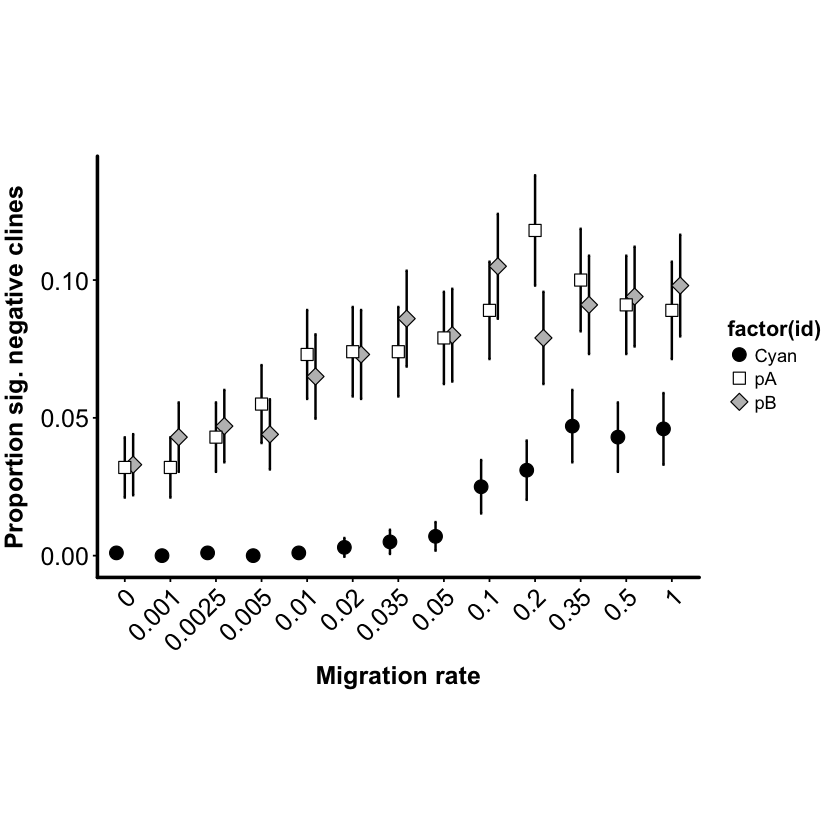

In [36]:
#Plot proportion of significantly negative clines by migration rate, colored and shaped by id
NegClines_Mig_Type <- ggplot(Kvary_Mig_Summary_250, aes(x = factor(Mig_rate), y = prop_sigNeg, 
    shape = factor(id), fill = factor(id))) + 
    geom_errorbar(aes(ymin = prop_sigNeg - ci_sigNeg, ymax = prop_sigNeg + ci_sigNeg), width=0.15, size = 0.7, 
    position = position_dodge(width = 0.55)) +
    ylab("Proportion sig. negative clines") + xlab("Migration rate") + geom_point(size = 3.5, color = "black", 
    position = position_dodge(width = 0.55)) +
    scale_shape_manual(labels = c("Cyan", "pA", "pB"), values=c(21, 22, 23)) +
    scale_fill_manual(labels = c("Cyan", "pA", "pB"), values=c("black", "white", "grey"))
NegClines_Mig_Type + ng1.45

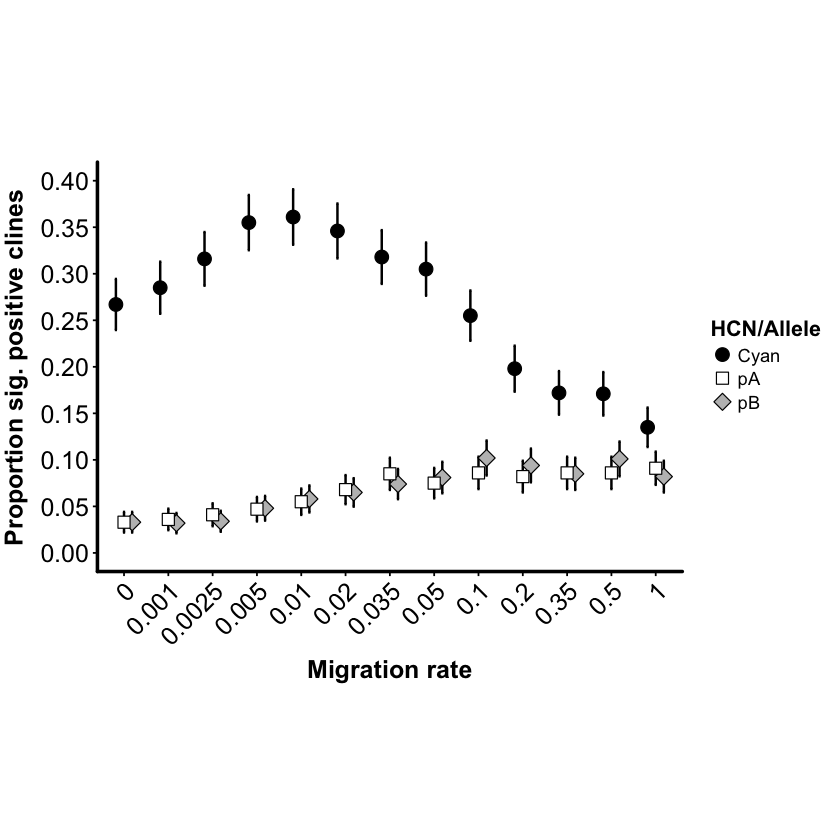

In [37]:
#Plot proportion of significantly positive clines by migration rate, colored and shaped by id
PosClines_Mig_Type <- ggplot(Kvary_Mig_Summary_250, aes(x = factor(Mig_rate), y = prop_sigPos, 
    shape = factor(id), fill = factor(id))) + 
    geom_errorbar(aes(ymin = prop_sigPos - ci_sigPos, ymax = prop_sigPos + ci_sigPos), width=0.15, size = 0.7, 
    position = position_dodge(width = 0.55)) +
    ylab("Proportion sig. positive clines") + xlab("Migration rate") + geom_point(size = 3.5, color = "black", 
    position = position_dodge(width = 0.55)) +
    scale_shape_manual(labels = c("Cyan", "pA", "pB"), values=c(21, 22, 23)) +
    scale_fill_manual(labels = c("Cyan", "pA", "pB"), values=c("black", "white", "grey")) + 
    coord_cartesian(ylim = c(0, 0.4)) + scale_y_continuous(breaks = seq(from = 0, to = 0.4, by = 0.05)) +
    labs(shape = "HCN/Allele", fill = "HCN/Allele") + ng1.45
PosClines_Mig_Type

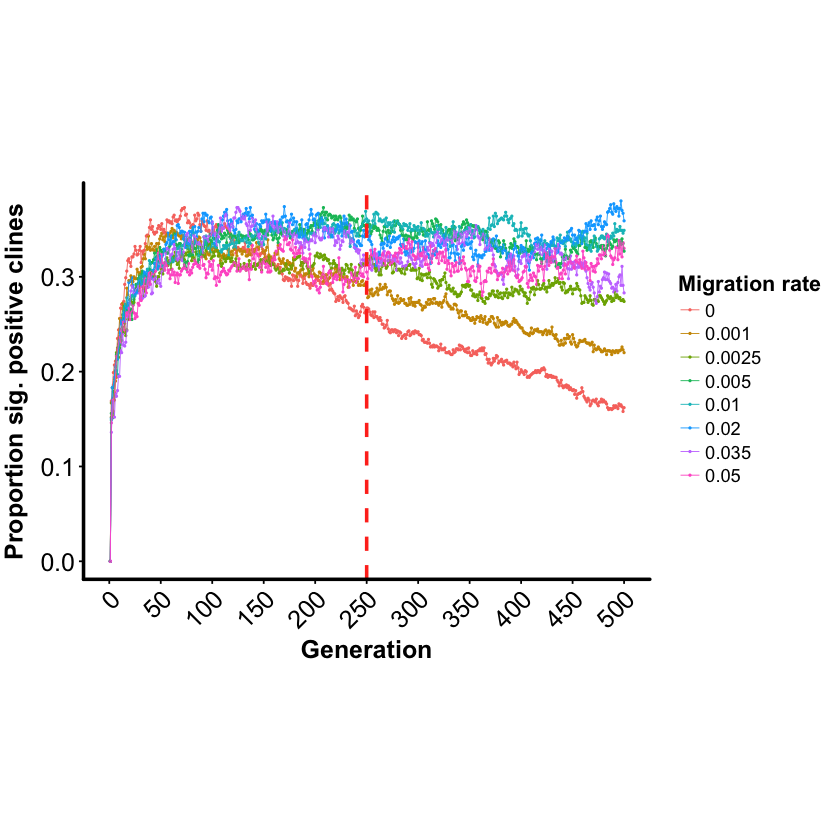

In [29]:
PropSigPos_Cyan_byGen <- ggplot(Kvary_Mig_Summary_Cyan, aes(x = Generation, y = prop_sigPos, group = Mig_rate, color = Mig_rate)) + 
    ylab("Proportion sig. positive clines") + xlab("Generation") + geom_point(size = 0.25, aes(color = Mig_rate)) +
    geom_line(size = 0.25, aes(color = Mig_rate)) + 
    coord_cartesian(xlim = c(0, 500)) + scale_x_continuous(breaks = seq(from = 0, to = 500, by = 50)) + 
    labs(color = "Migration rate") + 
    geom_vline(data = Kvary_Mig_Summary_Cyan, xintercept = 250, size = 1, colour = "#FF3721", linetype = "dashed") + ng1.45
PropSigPos_Cyan_byGen 

In [23]:
#Extra columns that will be used to create melting dataset for plotting proportion of positive and negative slopes
SlopeSum_Melt_Mig <- dplyr::select(Kvary_Mig_Summary_Gen500, id, Mig_rate, prop_sigPos, ci_sigPos, prop_sigNeg,
  ci_sigNeg)
SlopeSum_Melt_Mig <- SlopeSum_Melt_Mig %>%
    filter(id == "Cyan")

#Melt dataframe
dm1 <- melt(SlopeSum_Melt_Mig[c("Mig_rate", "prop_sigPos", "ci_sigPos", "id")], 
            id=c("Mig_rate", "ci_sigPos", "id"))
dm2 <- melt(SlopeSum_Melt_Mig[c("Mig_rate", "prop_sigNeg", "ci_sigNeg", "id")], 
            id=c("Mig_rate", "ci_sigNeg", "id"))

#Rename columns
setnames(dm1, old = "ci_sigPos", new = "ci")
setnames(dm2, old = "ci_sigNeg", new = "ci")

#Merge melted dataframes
SlopeSum_Melt_Mig <- rbind(dm1, dm2)

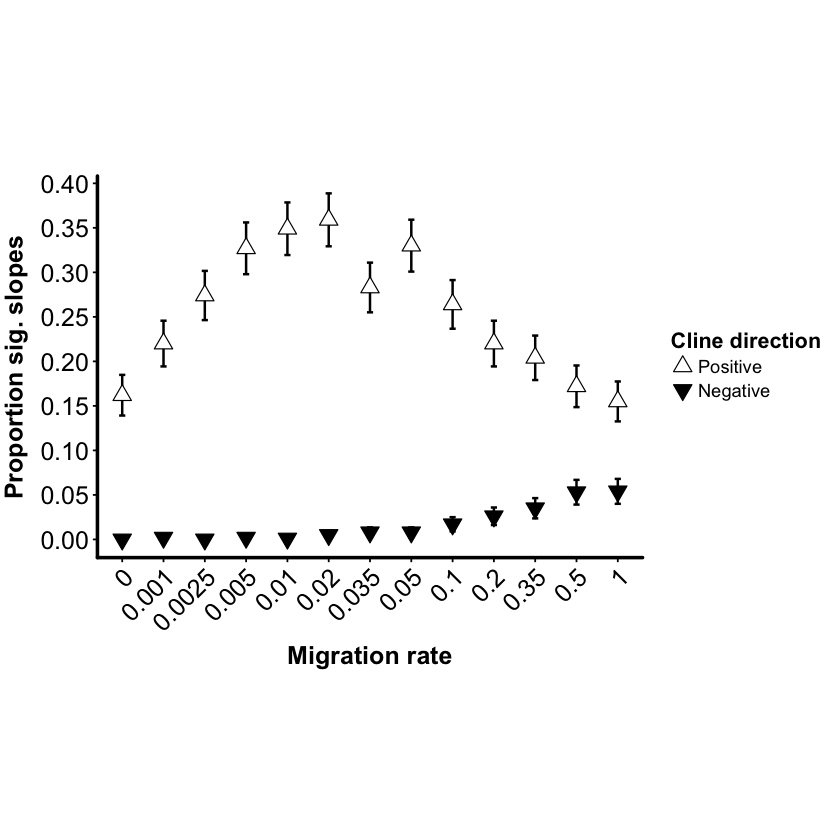

In [24]:
#Plot proportion of significant slopes by migration rate
PropSig_Mig <- ggplot(SlopeSum_Melt_Mig, aes(x = factor(Mig_rate), y = value, 
    shape = variable, fill = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7) +
    ylab("Proportion sig. slopes") + xlab("Migration rate") + geom_point(size = 3.5, color = "black") +
    scale_shape_manual(labels = c("Positive", "Negative"),values=c(24, 25)) +
    scale_fill_manual(labels = c("Positive", "Negative"),values=c("white", "black")) +
    scale_y_continuous(breaks = seq(from = 0, to = 1.0, by = 0.05)) +
    labs(shape = 'Cline direction', fill = 'Cline direction') + ng1.45
PropSig_Mig

In [30]:
path = "~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Git/SEC_Figures"

# PropSig_KminVary_Dir_NoLeg = PropSig_KminVary_Dir + theme(legend.position="none")
# MeanSlope_Mig_Type_NoLeg = MeanSlope_Mig_Type + theme(legend.position="none")
# PropSig_Mig_NoLeg = PropSig_Mig + theme(legend.position="none")

# ggsave("Figure-4A_MeanSlope_Kmin.pdf", plot = MeanSlope_Kmin, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("Figure-4D_PropSig_Kmin_Dir_NoLeg.pdf", plot = PropSig_KminVary_Dir_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("Figure-4B_MeanSlope_Mig_Alleles-HCN_NoLeg.pdf", plot = MeanSlope_Mig_Type_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("Figure-4D_PropSig_Mig_NoLeg.pdf", plot = PropSig_Mig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)

ggsave("Figure-S4A_MeanSlope_Cyan_byGen.pdf", plot = MeanSlope_Cyan_byGen, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S4B_PropSigPos_Cyan_byGen.pdf", plot = PropSigPos_Cyan_byGen, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
